In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from scipy.stats import entropy
from scipy.stats import mannwhitneyu as mwu
import plotly.graph_objects as go

###################################################
### Set the directory
dir_BCR_01H = '../Data/BulkBCRseq/1st/BCR_HC_CDR3/'
dir_BCR_01L = '../Data/BulkBCRseq/1st/BCR_LC_CDR3/'
dir_BCR_02H = '../Data/BulkBCRseq/2nd/BCR_HC_CDR3/'
dir_BCR_02L = '../Data/BulkBCRseq/2nd/BCR_LC_CDR3/'
dir_TCR_001 = '../Data/BulkTCRseq/1st/'
dir_TCR_002 = '../Data/BulkTCRseq/2nd/'
###################################################

In [2]:
def short_view(directory):
    all_dfs = []
    filenames = os.listdir(directory) 
    if filenames:
        filename = filenames[10]
        if filename.startswith('COV') and filename.endswith('.csv'):
            df = pd.read_csv(directory + filename, sep=',')
            df['Directory'] = directory.split('/')[-2]
            df.insert(0, 'Directory', df.pop('Directory'))
            all_dfs.append(df.head(n=2))
            
    result = pd.concat(all_dfs)
    display(result)

dir_list = [dir_BCR_01H, dir_BCR_01L, dir_BCR_02H, dir_BCR_02L, dir_TCR_001, dir_TCR_002]
for i in dir_list:
    short_view(i)

,Directory,Read Count,Fraction,Clonal Sequence,Clonal Sequence Quality,CDR3 Min Quality,CDR3 Sequence,CDR3 Amino Acid Sequence,Clonal Type,Frame Shift,Stop Codon,Amino Acid Length,V segment,all V hits,D segment,all D hits,J segment,all J hits,C segment,all C hits
0,BCR_HC_CDR3,2459,0.068749,TGTGCAAAAGGAGGCCGTATATCAGCAGATGGTCCTTCTGATTCTTGG,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,40,TGTGCAAAAGGAGGCCGTATATCAGCAGATGGTCCTTCTGATTCTTGG,CAKGGRISADGPSDSW,IGG,NaN,NaN,16,IGHV3-23,IGHV3-23,IGHD6-13,IGHD6-13,IGHJ1,IGHJ1;IGHJ4;IGHJ5,IGHG1,IGHG1;IGHG2;IGHGP
1,BCR_HC_CDR3,1974,0.055189,TGTGCGAGAGGCGCAAGAACTATACTTCGGGCCTGG,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,40,TGTGCGAGAGGCGCAAGAACTATACTTCGGGCCTGG,CARGARTILRAW,IGG,NaN,NaN,12,IGHV4-34,IGHV4-34,IGHD3-10,IGHD3-10;IGHD1-26;IGHD6-6,IGHJ5,IGHJ5;IGHJ4,IGHG1,IGHG1;IGHG2;IGHGP


,Directory,Read Count,Fraction,Clonal Sequence,Clonal Sequence Quality,CDR3 Min Quality,CDR3 Sequence,CDR3 Amino Acid Sequence,Clonal Type,Frame Shift,Stop Codon,Amino Acid Length,V segment,all V hits,D segment,all D hits,J segment,all J hits,C segment,all C hits
0,BCR_LC_CDR3,8270,0.081901,TGTCAGCAATATTATCTTAGTCCCTTCACTTTT,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,40,TGTCAGCAATATTATCTTAGTCCCTTCACTTTT,CQQYYLSPFTF,IGK,NaN,NaN,11,IGKV4-1,IGKV4-1,NaN,NaN,IGKJ2,IGKJ2,IGKC,IGKC
1,BCR_LC_CDR3,2522,0.024976,TGTCAACAACTTAGTAGTTACCCCCTCACTTTC,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,40,TGTCAACAACTTAGTAGTTACCCCCTCACTTTC,CQQLSSYPLTF,IGK,NaN,NaN,11,IGKV1-9,IGKV1-9,NaN,NaN,IGKJ4,IGKJ4,IGKC,IGKC


,Directory,Read Count,Fraction,Clonal Sequence,Clonal Sequence Quality,CDR3 Min Quality,CDR3 Sequence,CDR3 Amino Acid Sequence,Clonal Type,Frame Shift,Stop Codon,Amino Acid Length,V segment,all V hits,D segment,all D hits,J segment,all J hits,C segment,all C hits


,Directory,Read Count,Fraction,Clonal Sequence,Clonal Sequence Quality,CDR3 Min Quality,CDR3 Sequence,CDR3 Amino Acid Sequence,Clonal Type,Frame Shift,Stop Codon,Amino Acid Length,V segment,all V hits,D segment,all D hits,J segment,all J hits,C segment,all C hits
0,BCR_LC_CDR3,651,0.053453,TGCTGCTCATATGCAGGTAGTAGCCCCGTGGTATTC,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,40,TGCTGCTCATATGCAGGTAGTAGCCCCGTGGTATTC,CCSYAGSSPVVF,IGL,NaN,NaN,12,IGLV2-23,IGLV2-23,NaN,NaN,IGLJ2,IGLJ2,IGLC7,IGLC7;IGLC2;IGLC3;IGLC6
1,BCR_LC_CDR3,460,0.037770,TGTCAGACCTGGGGCACTGGCATTCAGGTATTC,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,40,TGTCAGACCTGGGGCACTGGCATTCAGGTATTC,CQTWGTGIQVF,IGL,NaN,NaN,11,IGLV4-69,IGLV4-69,NaN,NaN,IGLJ2,IGLJ2;IGLJ3,IGLC7,IGLC7;IGLC2;IGLC3;IGLC6


,Directory,Read Count,Fraction,Clonal Sequence,Clonal Sequence Quality,CDR3 Min Quality,CDR3 Sequence,CDR3 Amino Acid Sequence,Clonal Type,Frame Shift,Stop Codon,Amino Acid Length,V segment,all V hits,D segment,all D hits,J segment,all J hits,C segment,all C hits
0,1st,243,0.012202,TGCATCCTGAGAGACGACAATGACATGCGCTTT,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,40,TGCATCCTGAGAGACGACAATGACATGCGCTTT,CILRDDNDMRF,TRA,NaN,NaN,11,TRAV26-2,TRAV26-2,NaN,NaN,TRAJ43,TRAJ43,TRAC,TRAC
1,1st,141,0.007080,TGTGCTCTGAGTGAGGCGGGGGACACGGGCAGGAGAGCACTTACTTTT,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,40,TGTGCTCTGAGTGAGGCGGGGGACACGGGCAGGAGAGCACTTACTTTT,CALSEAGDTGRRALTF,TRA,NaN,NaN,16,TRAV19,TRAV19,NaN,NaN,TRAJ5,TRAJ5,TRAC,TRAC


,Directory,Read Count,Fraction,Clonal Sequence,Clonal Sequence Quality,CDR3 Min Quality,CDR3 Sequence,CDR3 Amino Acid Sequence,Clonal Type,Frame Shift,Stop Codon,Amino Acid Length,V segment,all V hits,D segment,all D hits,J segment,all J hits,C segment,all C hits
0,2nd,132,0.011495,TGTGCTACGGACGCGGGGGATGACAAGATCATCTTT,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,40,TGTGCTACGGACGCGGGGGATGACAAGATCATCTTT,CATDAGDDKIIF,TRA,NaN,NaN,12,TRAV17,TRAV17,NaN,NaN,TRAJ30,TRAJ30,TRAC,TRAC
1,2nd,130,0.011321,TGTGCAGCATTGAGAGATGGAGGAAGCCAAGGAAATCTCATCTTT,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,40,TGTGCAGCATTGAGAGATGGAGGAAGCCAAGGAAATCTCATCTTT,CAALRDGGSQGNLIF,TRA,NaN,NaN,15,TRAV29DV5,TRAV29DV5,NaN,NaN,TRAJ42,TRAJ42,TRAC,TRAC


In [ ]:
def diversity(data):
    total = sum(data)
    normal = data/total
    if normal is 0:
        return 0
    else:
        return -1*sum(normal*np.log(normal))

In [5]:
path = dir_BCR_01H
results = pd.DataFrame(columns=['Sample', 'Row_number', 'Total_readcount', 'Shannon', 'Own'])

for filename in os.listdir(path):
    if filename.endswith('.csv') and filename.startswith('COV'):
        sample = '_'.join(filename.split('_')[:2])
        data = pd.read_csv(path+filename)
        
        total = data['Read Count'].sum()
        shannon = entropy(data['Fraction'])         # already normalized (Read count -> Fraction)
        shannon02 = diversity(data['Fraction'])        # result is same with entropy
        
        results = results.append({'Sample': sample, 'Row_number': len(data), 'Total_readcount' : total,'Shannon': shannon, 'Own': shannon02}, ignore_index=True)
        results["Time_point"] = results["Sample"].str[-5]
        results["Type"] = results["Sample"].str[-3:]
        
print(results)


               Sample Row_number Total_readcount   Shannon       Own  \
0    COV-CCO-0411_IGG       2498           19342  6.727983  6.727983   
1    COV-CCO-0411_IGM       7006           11251  8.179853  8.179853   
2    COV-CCO-0412_IGG        348            1523  5.104862  5.104862   
3    COV-CCO-0412_IGM       1183            1850  6.769221  6.769221   
4    COV-CCO-0413_IGG       2743           12102  6.672048  6.672048   
..                ...        ...             ...       ...       ...   
835  COV-SCO-0722_IGM       1863            4641  6.458115  6.458115   
836  COV-SCO-0741_IGG       2246           14300  6.906704  6.906704   
837  COV-SCO-0741_IGM      10382           17849  8.579959  8.579959   
838  COV-SCO-0742_IGG       2255           15406  6.761581  6.761581   
839  COV-SCO-0742_IGM       9606           19017  8.118653  8.118653   

    Time_point Type  
0            1  IGG  
1            1  IGM  
2            2  IGG  
3            2  IGM  
4            3  IGG  
.. 

In [6]:
def shannon_maker(path):
    output = "../Result/"
    name = path.split('/')
    
    results = pd.DataFrame(columns=['Sample', 'Row_number', 'Total_readcount', 'Shannon_diversity'])
    
    for filename in os.listdir(path):
        if filename.endswith('.csv') and filename.startswith('COV'):
            sample = '_'.join(filename.split('_')[:2])
            data = pd.read_csv(path+filename, sep=',', low_memory=False)
            total = data['Read Count'].sum()
            
            ############################################
            ### "entropy" package problem
            # data['Fraction'] = data['Fraction'].fillna(0)
            # shannon = entropy(data['Fraction'])      
            ### Error ufunc 'entr' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
            ############################################
            
            shannon = diversity(data['Fraction'])
            results = results.append({'Sample': sample, 'Row_number': len(data), 'Total_readcount' : total,'Shannon_diversity': shannon}, ignore_index=True)
            results["Time_point"] = results["Sample"].str[-5]
            results["Type"] = results["Sample"].str[-3:]
    
    if name[2][4:7] == 'BCR':
        output_file = output + 'shannon_' + name[2][4:7] + '_0' + name[3][0] + '_' + name[4].split('_')[1] + '.csv'
    else:
        output_file = output + 'shannon_' + name[2][4:7] + '_0' + name[3][0] + '.csv'
            
    results.to_csv(output_file, index=False)
    if os.path.exists(output_file):
        print(f'{output_file} is created')

In [7]:
dir_list = [dir_BCR_01H, dir_BCR_01L, dir_BCR_02H, dir_BCR_02L, dir_TCR_001, dir_TCR_002]
for i in dir_list:
    shannon_maker(i)

../Result/shannon_BCR_01_HC.csv is created
../Result/shannon_BCR_01_LC.csv is created
../Result/shannon_BCR_02_HC.csv is created
../Result/shannon_BCR_02_LC.csv is created
../Result/shannon_TCR_01.csv is created
../Result/shannon_TCR_02.csv is created


    colnames = ['Sample', 'Row_number', 'Total_readcount', 'Shannon_diversity', 'Time_point', 'Type']
 
             012-456-89xx   (=numbering for easy indexing)
    Sample : COV-XXX-0000   (XXX: patients' initial severity, 0000: first 3 is patients' id + last number is timepoint)
    Timepoint :         ^   (same as last of Sample id)

    Type for BCR : major (IGG, IGM)
    Type for TCR : major (TRA, TRB)

In [8]:
def sample_counter(file):
    df = pd.read_csv(file)
    df['Sample'] = df['Sample'].str[0:11]
    # print(df['Sample'].unique())
    list = df['Sample'].unique()
    countid = len(list)
    return countid, list

for i in os.listdir('../Result/'):
    if i.startswith('shannon'):
        
        ### i 에 해당하는 각각의 list에 sample_counter("../Result/"+i)[1] 결과를 각각 저장
        locals()[i.split('.')[0][8:]+'_list'] = sample_counter("../Result/"+i)[1]
        
        print(f'{i} : {sample_counter("../Result/"+i)[0]}')

shannon_BCR_01_HC.csv : 215
shannon_BCR_01_LC.csv : 215
shannon_BCR_02_HC.csv : 50
shannon_BCR_02_LC.csv : 50
shannon_TCR_01.csv : 215
shannon_TCR_02.csv : 50


In [10]:
data_dir = '../Data/Clinical/'
# max_css = pd.read_csv( data_dir + "max_css_table.csv")
cl1 = pd.read_csv( data_dir + "clinical_data_1.csv", sep=',')
cl2 = pd.read_csv( data_dir + "clinical_data_2.csv", sep=',')

In [11]:
def id_counter(df):
    list = df['ID'].unique()
    countid = len(list)
    return countid, list

for df, name in zip([cl1, cl2], ["clinical_data_01", "clinical_data_02"]):
    locals()[name[9:]+'_list'] = id_counter(df)[1]
    print(f'{name}: {id_counter(df)[0]}')

clinical_data_01: 420
clinical_data_02: 239


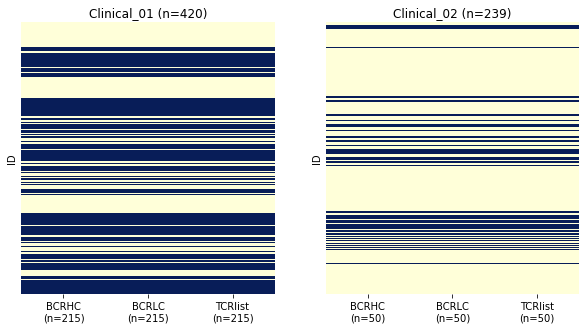

In [12]:
def id_checker(trial):
    
    target = 'data_'+trial+'_list'
    BCRHC = 'BCR_'+trial+'_HC_list'
    BCRLC = 'BCR_'+trial+'_LC_list'
    TCR = 'TCR_'+trial+'_list'
    
    dfs = []
    
    for i in globals()[target]:
        df = pd.DataFrame({'ID': i, BCRHC: int(i in globals()[BCRHC]), BCRLC: int(i in globals()[BCRLC]), TCR: int(i in globals()[TCR])}, index=[0])
        dfs.append(df)
        
    return dfs

df01, df02 = id_checker('01'), id_checker('02')
df01 = pd.concat(df01, ignore_index=True)
df02 = pd.concat(df02, ignore_index=True)

#################################################
### Heatmap

label01 = [f'{col.split("_")[0]}{col.split("_")[2]}\n(n={df01[col].sum()})' for col in ['BCR_01_HC_list', 'BCR_01_LC_list', 'TCR_01_list']]
label02 = [f'{col.split("_")[0]}{col.split("_")[2]}\n(n={df02[col].sum()})' for col in ['BCR_02_HC_list', 'BCR_02_LC_list', 'TCR_02_list']]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(df01.set_index('ID'), cmap='YlGnBu', cbar=False, yticklabels=0)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=label01)
plt.title('Clinical_01'+' (n='+str(len(df01))+')')
plt.subplot(1, 2, 2)
sns.heatmap(df02.set_index('ID'), cmap='YlGnBu', cbar=False, yticklabels=0)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=label02)
plt.title('Clinical_02'+' (n='+str(len(df02))+')')
plt.show()

In [13]:
data_dir = '../Result/'
BCRHC01 = pd.read_csv(data_dir + 'shannon_BCR_01_HC.csv')
BCRLC01 = pd.read_csv(data_dir + 'shannon_BCR_01_LC.csv')
TCR01 = pd.read_csv(data_dir + 'shannon_TCR_01.csv')
BCRHC02 = pd.read_csv(data_dir + 'shannon_BCR_02_HC.csv')
BCRLC02 = pd.read_csv(data_dir + 'shannon_BCR_02_LC.csv')
TCR02 = pd.read_csv(data_dir + 'shannon_TCR_02.csv')

all = [BCRHC01, BCRLC01, TCR01, BCRHC02, BCRLC02, TCR02]
only01 = [BCRHC01, BCRLC01, TCR01]
only02 = [BCRHC02, BCRLC02, TCR02]


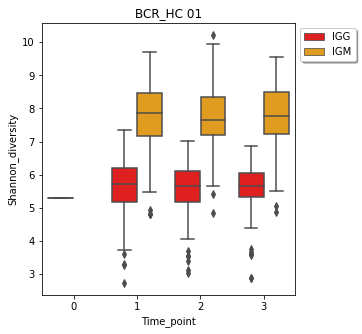

In [14]:
def shannon_boxplot(df1, df2, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Time_point', y='Shannon_diversity', hue='Type', data=df1, palette={'IGM': 'orange', 'IGG': 'red'})
    plt.title(title + ' 01')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), shadow=True, ncol=1)
    plt.show()
    
shannon_boxplot(BCRHC01, BCRHC02, 'BCR_HC')

In [15]:
## Timpoint가 0인 행을 데이터프레임으로 추출

BCRHC01_0 = BCRHC01[BCRHC01['Time_point'] == 0]
BCRHC01_0

,Sample,Row_number,Total_readcount,Shannon_diversity,Time_point,Type
592,COV-CNC-0390_IGG,320,810,5.290388,0,IGG


In [16]:
withtimepoint0 = BCRHC01[BCRHC01['Sample'].str.contains('COV-CNC-039')]
withtimepoint0 = withtimepoint0.append(BCRLC01[BCRLC01['Sample'].str.contains('COV-CNC-039')])
withtimepoint0 = withtimepoint0.append(TCR01[TCR01['Sample'].str.contains('COV-CNC-039')])
# withtimepoint0 = withtimepoint0.append(BCRHC02[BCRHC02['Sample'].str.contains('COV-CNC-039')])
# withtimepoint0 = withtimepoint0.append(BCRLC02[BCRLC02['Sample'].str.contains('COV-CNC-039')])
# withtimepoint0 = withtimepoint0.append(TCR02[TCR02['Sample'].str.contains('COV-CNC-039')])
withtimepoint0

,Sample,Row_number,Total_readcount,Shannon_diversity,Time_point,Type
592,COV-CNC-0390_IGG,320,810,5.290388,0,IGG
593,COV-CNC-0391_IGM,4378,5931,8.184363,1,IGM
592,COV-CNC-0391_IGK,4239,12409,7.583213,1,IGK
593,COV-CNC-0391_IGL,3238,10705,7.245475,1,IGL
592,COV-CNC-0391_TRA,22035,37251,9.633862,1,TRA
593,COV-CNC-0391_TRB,78426,142153,10.875342,1,TRB


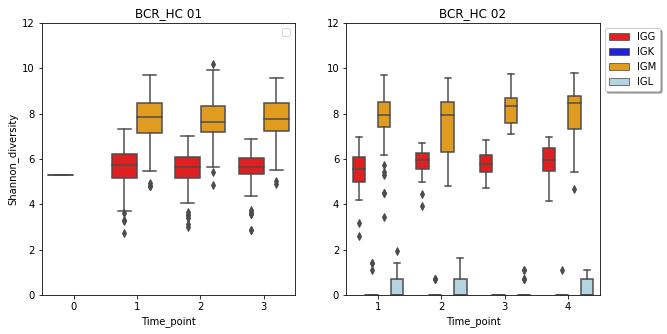

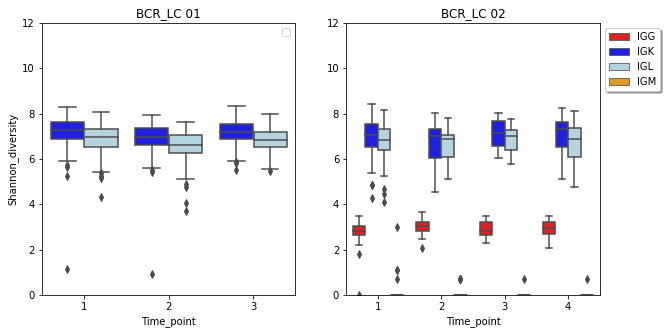

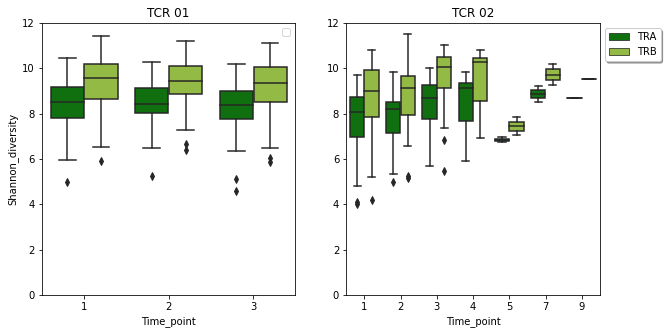

In [17]:
def shannon_boxplot(df1, df2, title):
    
    palette = {'IGM': 'orange', 'IGG': 'red', 'IGK': 'blue', 'IGL': 'lightblue', 'TRA': 'green', 'TRB': 'yellowgreen'}
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Time_point', y='Shannon_diversity', hue='Type', data=df1, palette=palette)
    plt.legend('')
    plt.ylim(0, 12)
    plt.title(title + ' 01')
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Time_point', y='Shannon_diversity', hue='Type', data=df2, palette=palette)
    plt.title(title + ' 02')
    plt.ylim(0, 12)
    plt.ylabel('')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), shadow=True, ncol=1)
    plt.show()
    
shannon_boxplot(BCRHC01, BCRHC02, 'BCR_HC')
shannon_boxplot(BCRLC01, BCRLC02, 'BCR_LC')
shannon_boxplot(TCR01, TCR02, 'TCR')

In [18]:
BCRHC01.loc[BCRHC01['Time_point'] == 0, 'Time_point'] = 1

In [19]:
for i in only02:
    i.loc[i['Time_point'] == 7, 'Time_point'] = 6
    i.loc[i['Time_point'] == 9, 'Time_point'] = 7

In [20]:
def shannon_boxplot(df1, df2, title):

    colors01 = {'IGM': 'gold', 'IGG': 'darkred', 'IGK': 'darkgray', 'IGL': 'slategray', 'TRA': 'turquoise', 'TRB': 'teal'}
    colors02 = {'IGM': 'orange', 'IGG': 'red', 'IGK': 'lightblue', 'IGL': 'steelblue', 'TRA': 'yellowgreen', 'TRB': 'green'}
    
    fig = go.Figure()
    
    # Add boxplot for df1
    for t in ['IGM', 'IGG', 'IGK', 'IGL', 'TRA', 'TRB']:
        temp = df1[df1['Type'] == t]
        fig.add_trace(go.Box(y=temp['Shannon_diversity'], x=temp['Time_point'], name=f'01_{t}', marker_color=colors01[t]))
    
    # Add boxplot for df2
    for t in ['IGM', 'IGG', 'IGK', 'IGL', 'TRA', 'TRB']:
        temp = df2[df2['Type'] == t]
        fig.add_trace(go.Box(y=temp['Shannon_diversity'], x=temp['Time_point'], name=f'02_{t}', marker_color=colors02[t]))
    
    for timepoint in df2['Time_point'].unique():
        fig.add_shape(
            type="rect", xref="x", yref="paper",
            x0=timepoint - 0.5, y0=0,
            x1=timepoint + 0.5, y1=1,
            line=dict(color="lightgray",width=1)
            )
    
    fig.update_layout(title=title, xaxis_title='Time Point', yaxis_title='Shannon Diversity', boxmode='group',
                      plot_bgcolor='rgba(255, 255, 255, 1)', yaxis=dict(gridcolor='lightgray'), width=1000, height=400)
    fig.show()

shannon_boxplot(BCRHC01, BCRHC02, 'Comparison of BCR_HC 01 and BCR_HC 02')
shannon_boxplot(BCRLC01, BCRLC02, 'Comparison of BCR_LC 01 and BCR_LC 02')
shannon_boxplot(TCR01, TCR02, 'Comparison of TCR 01 and TCR 02')

In [21]:
def timepoint_counter(df):
    table = df.groupby(['Time_point', 'Type']).size().unstack(fill_value=0)
    return table

final = pd.DataFrame()
allname = ['BCRH01', 'BCRL01', 'TCR01', 'BCRH02', 'BCRL02', 'TCR02']

for idx, df in enumerate(all):
    result = timepoint_counter(df)
    result['Source'] = allname[idx]
    final = final.append(result)
    final = final.fillna(0)
    final = final[['Source'] + [col for col in final.columns if col != 'Source']]

final.columns.name = None
final = final.reset_index()

final

,Time_point,Source,IGG,IGM,IGK,IGL,TRA,TRB
0,1,BCRH01,215.0,215.0,0.0,0.0,0.0,0.0
1,2,BCRH01,93.0,93.0,0.0,0.0,0.0,0.0
2,3,BCRH01,112.0,112.0,0.0,0.0,0.0,0.0
3,1,BCRL01,0.0,0.0,215.0,215.0,0.0,0.0
4,2,BCRL01,0.0,0.0,93.0,93.0,0.0,0.0
5,3,BCRL01,0.0,0.0,112.0,112.0,0.0,0.0
6,1,TCR01,0.0,0.0,0.0,0.0,215.0,215.0
7,2,TCR01,0.0,0.0,0.0,0.0,93.0,93.0
8,3,TCR01,0.0,0.0,0.0,0.0,112.0,112.0
9,1,BCRH02,43.0,43.0,26.0,37.0,0.0,0.0


In [22]:
def mutest(df1, df2, timepoint, type):
    group1 = df1[(df1['Time_point'] == timepoint) & (df1['Type'] == type)]['Shannon_diversity']
    group2 = df2[(df2['Time_point'] == timepoint) & (df2['Type'] == type)]['Shannon_diversity']
    statistic, p_value = mwu(group1, group2, alternative='two-sided')                           # two-sided, because HA: μ1≠μ2 
    return statistic, round(p_value,3)

timepoints = [1, 2, 3]
types = [['IGM', 'IGG'],['IGK', 'IGL'],['TRA', 'TRB']]
testsets = ['BCRHC01', 'BCRLC01', 'TCR01']
results_df = pd.DataFrame(columns=['set', 'timepoint', 'type', 'statistic', 'p-value'])

for t in timepoints:
    for set in testsets:
        if 'HC' in set:
            for ty in types[0]:
                stat, p_value = mutest(globals()[set], globals()[set.replace("01", "02")], t, ty)
                results_df = results_df.append({'set': set[:-2], 'timepoint': t, 'type': ty, 'statistic': stat, 'p-value': p_value}, ignore_index=True)
        elif 'LC' in set:
            for ty in types[1]:
                stat, p_value = mutest(globals()[set], globals()[set.replace("01", "02")], t, ty)
                results_df = results_df.append({'set': set[:-2], 'timepoint': t, 'type': ty, 'statistic': stat, 'p-value': p_value}, ignore_index=True)
        else:
            for ty in types[2]:
                stat, p_value = mutest(globals()[set], globals()[set.replace("01", "02")], t, ty)
                results_df = results_df.append({'set': set[:-2], 'timepoint': t, 'type': ty, 'statistic': stat, 'p-value': p_value}, ignore_index=True)

results_df

,set,timepoint,type,statistic,p-value
0,BCRHC,1,IGM,4349.0,0.541
1,BCRHC,1,IGG,5042.0,0.348
2,BCRLC,1,IGK,5405.0,0.080
3,BCRLC,1,IGL,5042.0,0.348
4,TCR,1,TRA,5079.0,0.003
5,TCR,1,TRB,4872.0,0.013
6,BCRHC,2,IGM,1271.0,0.851
7,BCRHC,2,IGG,1051.0,0.124
8,BCRLC,2,IGK,1400.0,0.549
9,BCRLC,2,IGL,1245.0,0.728
